# LIBRERIE DI MACHINE LEARNING

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras
import keras_tuner as kt
from sklearn.cluster import DBSCAN

2025-02-27 13:06:11.440284: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-27 13:06:11.468429: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-27 13:06:11.477139: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-27 13:06:11.558730: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


---

# SCI-KIT LEARN
Scikit-Learn è una delle librerie più usate in Python per il Machine Learning. Fornisce strumenti semplici ed efficienti per l'apprendimento supervisionato e non supervisionato, oltre a utilità per la preparazione dei dati, la valutazione dei modelli e il tuning degli iperparametri. La importiamo con `import sklearn as sl`. For intel users, you can use the optimized version *sklearnex*.

Caratteristiche principali:
* Facilità d’uso: API intuitive basate su NumPy, SciPy e Matplotlib.
* Ampia gamma di modelli: regressione, classificazione, clustering, riduzione della dimensionalità.
* Compatibilità con altre librerie: si integra bene con Pandas e NumPy.

I principali moduli sono:
* `sklearn.linear_model`: Regressione lineare, logistica, ecc.
* `sklearn.tree	`: Decision Trees
* `sklearn.ensemble`: Random Forest, Gradient Boosting
* `sklearn.svm`: Support Vector Machines
* `sklearn.cluster`: K-Means, DBSCAN, Agglomerative Clustering
* `sklearn.decomposition`: PCA, ICA (riduzione della dimensionalità)
* `sklearn.preprocessing`: Standardizzazione, encoding delle feature
* `sklearn.model_selection`: Train-test split, cross-validation
* `sklearn.metrics`: Accuracy, precision, recall, confusion matrix

In [2]:
import sklearn as sl

### PREPROCESSING
La libreria `sklearn.preprocessing` di scikit-learn offre strumenti per preparare e trasformare i dati prima di addestrare un modello. Le principali operazioni includono:

* StandardScaler → Standardizza i dati (lungo le colonne) con media 0 e varianza 1. Usa la formula $x'= \frac{x-\mu}{\sigma}$
* MinMaxScaler → Scala i dati in un intervallo (default: 0,10,1).
* Normalizer → Normalizza ogni riga affinché abbia norma euclidea 1 (utile per dati testuali e distanze).
* Binarizer → Converte i valori in 0 o 1 rispetto a una soglia.

Tali metodi possono essere applicati tramite metodo `.fit_transform()`, che calcola i parametri col metodo `.fit()` e li applica con `.transform()` (entrambi i metodi esistono singolarmente).

Tipicamente si applica il riscalamento di StandardScaler al training set e si usano i parametri trovati anche sul test set, in tal modo si ottiene un riscalamento del test set (anche se non precismanete a media 0 e varianza 1) senza toccare i suoi dati. Il test set non va infatti mai usato prima di usarlo per testare il modello alla fine del training.

NOTA: i metodi vanno applicati in righe separate, tipo StandardScaler.fit() darebbe errore (vedi esempio)

NOTA: StandardScaler lavora con array bidimensionali (matrici), quindi se x è un array 1D bisogna trasformarlo in una colonna con .reshape(-1,1)

In [3]:
from sklearn.preprocessing import StandardScaler
x = np.array( [ 1,2,3,4,5,6,7,8,9 ] ).reshape(-1,1)
y = np.array( [ [1,2,3], 
                [4,5,6] ] )

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)
print(x_scaled, '\n')

y_scaled = scaler.fit_transform(y)
print(y_scaled)                    # dati standardizzati lungo le colonne

[[-1.54919334]
 [-1.161895  ]
 [-0.77459667]
 [-0.38729833]
 [ 0.        ]
 [ 0.38729833]
 [ 0.77459667]
 [ 1.161895  ]
 [ 1.54919334]] 

[[-1. -1. -1.]
 [ 1.  1.  1.]]


### NEURAL NETWORK
Il metodo `MLPClassifier` (Multi-layer Perceptron Classifier) della libreria `sklearn.neural_network` crea una rete neurale feedforward per classificazione. Supporta più hidden layers, backpropagation e varie funzioni di attivazione. La sintassi è abbastanza complessa ed è:

`MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, learning_rate_init=0.001, max_iter=200, random_state=None, tol=1e-4, batch_size)`

Parametri principali:
* *hidden_layer_sizes* (default: (100,)): Tupla che indica il numero di neuroni in ogni hidden layer. Ad esempio, (100, 50) crea una rete con 2 strati nascosti: 100 neuroni nel primo e 50 nel secondo.
* *activation* (default: 'relu'): Funzione di attivazione da usare per i neuroni. Può essere: 'relu': ReLU (Rectified Linear Unit), 'tanh': Tangente iperbolica, 'logistic': Funzione sigmoide.
* *solver* (default: 'adam'): Algoritmo di ottimizzazione da usare. Può essere: 'adam': Ottimizzatore stocastico basato su gradienti. 'sgd': Discesa del gradiente stocastica. 'lbfgs': Metodo quasi-newtoniano (approccio deterministico).
* *alpha* (default: 0.0001): Coefficiente per la regolarizzazione L2 (penalizzazione dei pesi).
* *learning_rate_init* (default: 0.001): Tasso di apprendimento iniziale. Importante per la velocità di convergenza.
* *max_iter* (default: 200): Numero massimo di iterazioni per il training.
* *random_state* (default: None): Semenza per la generazione di numeri casuali, utile per la riproducibilità.
* *tol*: Quando la riduzione della perdita tra due iterazioni successive è inferiore alla tolleranza, l'addestramento si ferma.
* *batch_size*: controlla la dimensione del batch (ovvero quanti data sample usare) usato durante l'allenamento quando il solver scelto è 'sgd' o 'adam'. (vedi funzionamento sgd per capire)

Metodi principali:
* `.fit(x, y)`: Allena il modello sui dati di addestramento x (caratteristiche) e y (etichette).
* `.predict(x)`: Restituisce le etichette previste per i dati di input x.
* `.score(x, y)`: Restituisce la precisione del modello sui dati di test x e le etichette y (usa internamente .predict). Assume un valore tra 0 (pessima) e 1 (perfetta).

Attributi (accedibili dopo aver allenato con .fit):
* `.loss_curve_`: lista dei valori della funzione di perdita calcolato dopo ogni iterazione dell'addestramento.

Esempio utile:
* *.score(X_training, Y_training)*: è la train accuracy e misura quanto il modello è "adattato" ai dati di addestramento (overfitting indicator). Poichè anche se è stato allenato (con fit) su quegli stessi dati, non è detto che li preveda tutti giusti. Se lo facesse staremmo facendo overfitting.
* *.score(X_test, Y_test)*: è la test accuracy e misura la capacità di generalizzazione del modello, dandoci l'accuratezza (rapporto tra previsioni corrette ed errate).

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Carica il dataset
digits = load_digits()
X, y = digits.data, digits.target
# Suddividi il dataset in training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crea il modello MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)

# Allena il modello
mlp.fit(X_train, y_train)

# Fai delle previsioni
y_pred = mlp.predict(X_test)

# Calcola l'accuratezza
accuracy = mlp.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


### GridSearchCV
`GridSearchCV` è una classe di scikit-learn che automatizza la ricerca dei migliori iperparametri per un modello, eseguendo una ricerca su un determinato set di parametri con la Cross Validation. Si importa con `from sklearn.model_selection import GridSearchCV`. La sintassi principale è:

`GridSearchCV(estimator, param_grid, cv=5, refit=True)`

Parametri principali:
* *estimator*: Il modello che si desidera ottimizzare. Esempio: MLPClassifier(), SVC(), RandomForestClassifier(), ecc.
* *param_grid*: Un dizionario o una lista di dizionari contenente i parametri che si desidera testare. La chiave è il nome del parametro, e i valori sono le possibili opzioni.
* *cv* (opzionale): Il numero di divisioni per la cross-validation. Se non specificato, viene usato il valore predefinito (5).
* *refit* (opzionale): Se True, il miglior modello trovato verrà riaddestrato sui dati di addestramento completi. Di default è True.

Metodi principali:
* `.fit(x, y)`: Esegue la ricerca sui parametri definiti in param_grid utilizzando i dati di addestramento x e le etichette y. Utilizza la cross-validation per testare tutte le combinazioni di parametri.
* `.predict(x)`:  Usa il miglior modello trovato per fare previsioni sui dati x.
* `.score(x, y)`: Calcola la performance (del miglior modello trovato) sui dati di test x e le etichette y. Per la classificazione, restituisce l'accuratezza. Assume un valore tra 0 (pessima) e 1 (perfetta).
 
Attributi (accedibili dopo aver allenato con .fit):
* `.best_params_` : Restituisce il set di parametri che ha prodotto le migliori performance durante la ricerca.
* `.best_estimator_` : Restituisce il modello addestrato con i migliori parametri trovati.
* `.best_score_` : Restituisce la miglior performance (scoring sul validation set) ottenuta durante la ricerca dei parametri con cross-validation. Assume un valore tra 0 (pessima) e 1 (perfetta).

Tipically the flow of work is: prima usa GridSearchCV per identificare la combinazione ottimale di layer, neuroni e learning rate. Poi usa MLPClassifier con i parametri ottimali per allenare la rete completa e testarla su nuovi dati.

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
import warnings
# Disattiva i warning
warnings.filterwarnings("ignore")

# Carica il dataset Iris
iris = load_iris()
X, y = iris.data, iris.target
# Suddividi il dataset in training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definisci il modello MLP
mlp = MLPClassifier(max_iter=500)

# Definisci il grid di parametri da testare
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)], 
    'activation': ['relu', 'tanh'], 
    'solver': ['adam', 'sgd']
}

# Imposta GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, verbose=0)

# Esegui la ricerca
grid_search.fit(X_train, y_train)

# Mostra i migliori parametri trovati
print("Migliori parametri:", grid_search.best_params_)

# Calcola la precisione del modello migliore sui dati di test
print(f"Accuracy su test set: {grid_search.score(X_test, y_test):.2f}")


Migliori parametri: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'solver': 'adam'}
Accuracy su test set: 1.00


### KMEANS CLUSTERING
K-means è un algoritmo di clustering non supervisionato che suddivide i dati in k gruppi basandosi sulla similarità tra i punti. L'obiettivo è minimizzare la somma delle distanze al quadrato tra i punti e il centroide del cluster di appartenenza. Inizialmente si sceglie casualmente k centroidi iniziali, poi: (1) si assegna ciascun punto al cluster il cui centroide è il più vicino, (2) si ricalcolano i centroidi come media dei punti assegnati in ciascun cluster, infine si ripetono i passaggi 1 e 2 finché i centroidi non cambiano significativamente o si raggiunge il numero massimo di iterazioni.

Si può usare tale metodo importando la libreria `from sklearn.cluster import KMeans`. La sintassi principale è:

`KMeans(n_clusters=8, init='k-means++', n_init='auto', max_iter=300, random_state=42)`

Gli argomenti principali sono:
* *n_clusters*: numero di cluster da trovare (default: 8).
* *init*: metodo per inizializzare i centroidi: 'k-means++' (default): posiziona i centroidi per accelerare la convergenza. 'random': centroidi casuali. array personalizzato: specifica i centroidi iniziali manualmente.
* *n_init*: numero di esecuzioni indipendenti (consigliato: 'auto' per impostazioni ottimali).
* *max_iter*: numero massimo di iterazioni per ciascuna esecuzione (default: 300).
* *random_state*: per rendere i risultati riproducibili.

Metodi principali:
* `.fit(x)`: addestra il modello sui dati x.
* `.predict(x)`:  assegna un cluster a ciascun punto fornito in x.
* `.fit_predict(X)`: addestra e restituisce le etichette direttamente.
 
Attributi (accedibili dopo aver allenato):
* `.inertia_` : somma delle distanze al quadrato tra punti e centroidi.
* `.cluster_centers_` : coordinate dei centroidi.
* `.labels_` : etichette dei cluster dopo il fitting.

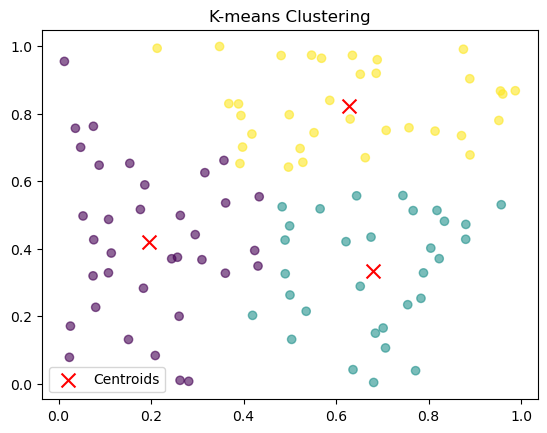

In [6]:
from sklearn.cluster import KMeans

# Creazione di un dataset casuale 2D:
X = npr.rand(100, 2)

# Inizializzazione:
kmeans = KMeans(n_clusters=3, random_state=42)
# Training:
kmeans.fit(X)

# Visualizzazione dei cluster:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.scatter(*kmeans.cluster_centers_.T, color='red', marker='x', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()


### DBSCAN CLUSTERING
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm that groups together closely packed data points and identifies points that lie alone in low-density regions as noise. Unlike other clustering algorithms like k-means, DBSCAN does not require the number of clusters to be specified beforehand. Instead, it requires two key parameters:
* **Epsilon** ($\epsilon$): this parameter defines the maximum distance between two points for them to be considered as neighbors. It is crucial in determining how "close" the points need to be for clustering to occur.
* **num_neighbors**: This parameter defines the minimum number of points required to form a dense region (i.e., a cluster). If a point has fewer than min_samples neighbors within the distance defined by epsilon, it is considered noise.

DBSCAN works by examining the local density of points, and it labels the points in one of three categories:
* Core Points: Points that have at least min_samples points within their epsilon radius.
* Border Points: Points that are within the epsilon radius of a core point but do not have enough neighbors to be core points.
* Noise Points: Points that do not satisfy the core point or border point criteria.

In scikit-learn, DBSCAN is implemented with `from sklearn.cluster import DBSCAN`. To use it, you need to specify the eps and num_neighbors parameters. The syntax is:

`DBSCAN(eps=0.5, min_samples=5, metric='euclidean', algorithm='auto', leaf_size=30, p=None, n_jobs=None)`

The main arguments are:
* *eps* (default=0.5): the maximum distance between two samples for one to be considered as in the neighborhood of the other.
* *min_samples* (default=5): the number of samples in a neighborhood for a point to be considered as a core point. 
* *metric* (default='euclidean'): the distance metric to use for the calculation of point proximity. Common options: 'euclidean', 'manhattan'.
* *algorithm* (default='auto'): the algorithm to use for nearest neighbors search. Possible choices: {'auto', 'ball_tree', 'kd_tree', 'brute'}. 'auto' tries to select the best option based on the data. 'ball_tree' and 'kd_tree' are data structures used for efficient searching in high-dimensional data. 'brute' uses a brute-force approach.
* *leaf_size* (default=30): the leaf size passed to the tree algorithms (BallTree or KDTree). It controls the speed of construction and query operations.
* *n_jobs* (int input, default=None): the number of CPU cores to use for the computation. None means 1 core. Use -1 to use all available cores.

The main method of the class are:
* `.fit(X)`: fits the DBSCAN model to the data X. It performs the clustering by identifying core points, finding neighborhoods based on the eps distance, and assigning labels to each point. X is the array-like of shape (n_samples, n_features), the input data to fit the model on, where n_samples is the number of data points and n_features is the number of features. Returns the fitted DBSCAN object.
* `.fit_predict(X)`: fits the DBSCAN model to X and returns the labels for each sample in X directly, similar to calling .fit(X) and then accessing .labels_. Returns an array of shape (n_samples,) with the labels
* `.kneighbors(X)`: returns the distance and indices of the nearest neighbors for each point in X. It can be useful when you're interested in the proximity of points to their neighbors. Returns: *distances*: array, shape (n_samples, n_neighbors) with the distances to the nearest neighbors; *indices*: array, shape (n_samples, n_neighbors) with the indices of the nearest neighbors.
* `.get_params()`: Returns the parameters of the DBSCAN model as a dictionary. This can be used to get the current settings of the model. Returns: *params*: dictionary containing the hyperparameters and their values.
* `.set_params(**params)`: allows you to set the hyperparameters of the DBSCAN model. You pass the parameters as keyword arguments, and the model is updated with the new settings. Parameters: **params: Keyword arguments specifying the parameters you want to set (e.g., eps, min_samples). Returns the updated DBSCAN object with the new parameters.

THe main attributes are:
* labels_: array, shape (n_samples,). The cluster labels for each point in the dataset. Noise points are labeled as -1.
* core_sample_indices_: array, shape (n_core_samples,). The indices of the core samples in the dataset. Core samples are points that have at least min_samples points in their eps-neighborhood.
* components_: array, shape (n_core_samples, n_features). The core samples (the points from the core_sample_indices_) themselves.
* n_iter_: int. The number of iterations used to compute the DBSCAN clustering.
* metric_: string. The actual distance metric used, based on the metric parameter passed.

After fitting the model to your data, you can retrieve the cluster labels using the labels_ attribute. Points labeled as -1 are considered noise.

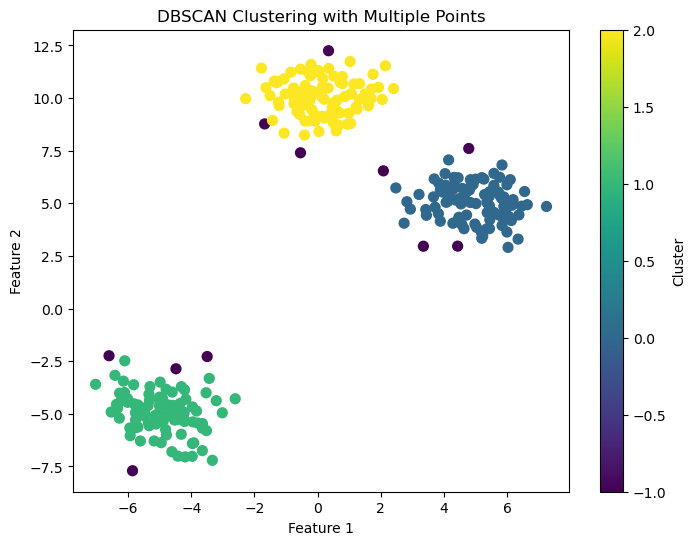

In [6]:

# Creiamo un dataset più grande con due gruppi di punti
X = np.concatenate([
    np.random.randn(100, 2) + [5, 5],  # Primo cluster: punti centrati intorno a [5, 5]
    np.random.randn(100, 2) + [-5, -5], # Secondo cluster: punti centrati intorno a [-5, -5]
    np.random.randn(100, 2) + [0, 10]   # Terzo cluster: punti centrati intorno a [0, 10]
])

# Inizializziamo DBSCAN con epsilon (eps) e min_samples
dbscan = DBSCAN(eps=0.8, min_samples=5)

# Applichiamo DBSCAN ai dati
dbscan.fit(X)

# Estraiamo le etichette dei cluster
labels = dbscan.labels_

# Grafico dei risultati
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering with Multiple Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster')
plt.show()



### AGGLOMERATIVE CLUSTERING (LINKED-BASED)
Agglomerative Clustering è un algoritmo di clustering gerarchico che segue un approccio bottom-up: parte con ogni punto come cluster singolo e li unisce progressivamente fino a raggiungere il numero desiderato di cluster.

Fasi dell'algoritmo: Inizialmente ogni punto è un cluster separato, poi (1) si calcola la distanza tra tutti i cluster esistenti e (2) si uniscono i due cluster più simili secondo il criterio di linkage scelto. Infine si ripetono i passi 1 e 2 fino a ottenere il numero di cluster desiderato.

Si può usare tale metodo importando la libreria `from sklearn.cluster import AgglomerativeClustering`. La sintassi principale è:

`AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')`

Gli argomenti principali sono:
* *n_clusters*: numero di cluster da trovare (default: 2).
* *linkage*:  criterio per calcolare la distanza tra i cluster: 'ward' (default): minimizza la varianza all'interno dei cluster (richiede euclidean). 'complete': distanza massima tra punti di cluster diversi. 'average': distanza media tra punti di cluster diversi. 'single': distanza minima tra punti di cluster diversi.
* *affinity*: metrica per calcolare la distanza tra punti (es. 'euclidean', 'manhattan', 'cosine'). Ignorato se linkage='ward'

Metodi principali:
* `.fit(x)`: addestra il modello sui dati x.
* `.fit_predict(X)`: addestra e restituisce le etichette direttamente.

Attributi (accedibili dopo aver allenato):
* `.n_clusters_` : numero di cluster formati.
* `.labels_` : etichette dei cluster dopo il fitting.

Nota: AgglomerativeClustering non ha il metodo predict: è un algoritmo basato su vicinanza e distanze gerarchiche quindi una volta costruita la struttura gerarchica, non può generalizzare su nuovi dati.

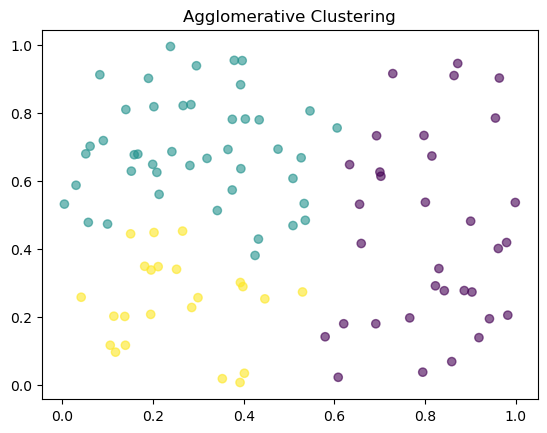

In [7]:
from sklearn.cluster import AgglomerativeClustering

# Creazione di un dataset casuale 2D
X = npr.rand(100, 2)

# Inizializzazione:
agg_clust = AgglomerativeClustering(n_clusters=3, linkage='ward')
# Training:
labels = agg_clust.fit_predict(X)

# Visualizzazione dei cluster
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('Agglomerative Clustering')
plt.show()

---

# KERAS (for neural networks)
Keras è una libreria di alto livello per la creazione e l'addestramento di reti neurali, integrata in TensorFlow, e si importa con `from tensorflow import keras`. È progettata per essere facile da usare, modulare ed estensibile, consentendo di costruire modelli in poche righe di codice. Comprende il supporto a GPU.

### SEQUENTIAL
**Sequential** di Keras è una classe che permette di creare un modello di rete neurale come una sequenza lineare di livelli (layers). È utile quando ogni livello ha un solo ingresso e una sola uscita, quindi il flusso di dati è semplice e senza rami. Si importa con `from keras.models import Sequential`.

Creiamo la struttura di una rete neurale vuota con `name_model = Sequential()`. 

`.add()`: Per aggiungere dei layer o delle modifiche alla rete neurale usiamo il metodo `.add(layer_type)`. Con add possiamo aggiungere:
* `Dense(units, activation='relu', input_shape=None)`: è un layer completamente connesso, dove ogni neurone è connesso a tutti i neuroni del livello successivo. Si può impostare il numero di neuroni di output (units), l'activation function (relu, sigmoid, tanh, ecc) e nel caso sia il primo layer di input anche la input_shape come tupla che specifica il numero di feature in input.
* `Dropout(rate)`: disattiva casualmente una frazione (rate) di neuroni durante l'addestramento, riducendo l'overfitting. Accetta valori in [0,1].

`.compile()`: Dopo aver creato la struttura delle rete neurale dobbiamo configurare il modello prima dell'addestramento, specificando ottimizzatore, funzione di perdita e metriche di valutazione. E lo facciamo con `.compile(optimizer, loss, metrics=None)`, dove:
* optimizer → Algoritmo di ottimizzazione (es. 'adam', 'sgd', 'RMSprop'). Acceta anche l'oggeto optimizer come optimizers.SGD(learning_rate)
* loss → Funzione di perdita (es. 'binary_crossentropy', 'mse')
* metrics (opzionale) → Lista di metriche da monitorare (es. ['accuracy']).

`.fit()`Possiamo ora passare all'allenamento delle rete neurale con `.fit(x, y, epochs=100, batch_size=32, validation_data=None, verbose=1)`. Returns a History object. Its History.history attribute is a dictionary and record of many parameters at each epoch. Esse sono accedibili con .history['loss'] (training loss), .history['val_loss'] (validation loss), .history['accuracy'] (accuracy sul training set), .history['val_accuracy'] (accuracy sul validation set) ecc, ed ognuno contiene una lista con i valori variabili per ogni epoca. Gli argomenti principali sono:
* x → Dati di input (array NumPy o TensorFlow).
* y → Etichette/valori target.
* epochs → Numero di epoche (quante volte il modello vede i dati).
* batch_size → Numero di campioni elaborati per volta (default: 32).
* validation_data → Tuple (x_val, y_val) per valutare il modello a ogni epoca.
* verbose → Livello di output (0: silenzioso, 1: barra di avanzamento, 2: solo riepilogo).

Dopo aver allenato il modello possiamo ottenere la loss e le mtriche e anche fare previsioni su nuovi dati:
* `loss, metric_1, metric_2, ... = model.evaluate(X_test, y_test, batch_size=32)`: Restituisce la perdita e le metriche definite in .compile(). Accetta come input dei dati x con label y e il numero di campioni elaborati per batch.
* `y_pred = model.predict(X, batch_size=32)`: Restituisce un array con le predizioni fatte sui dati di input x.

NOTA: con il metodo`.summary()` di Sequential otteniamo una panoramica della struttura del modello, mostrando i livelli, la forma degli output e il numero totale di parametri addestrabili.

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Dati casuali di input (100 campioni, 10 feature ciascuno)
X = npr.rand(100, 10)
y = npr.randint(0, 2, size=(100,))  # Target binario (0 o 1)

# Creazione del modello Sequential
model = Sequential()
model.add( Dense(32, activation='relu', input_shape=(10,)) )   # Livello denso con 32 neuroni e un input di 10 features
model.add( Dropout(0.2)  )                                     # Dropout del 20% per ridurre l'overfitting
model.add( Dense(1, activation='sigmoid') )                    # Output per classificazione binaria

# Compilazione del modello
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Addestramento del modello (fit)
model.fit(X, y, epochs=5, batch_size=10, verbose=2)  # 5 epoche per velocizzare

# Valutazione del modello (evaluate)
loss, accuracy = model.evaluate(X, y)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Predizione su nuovi dati
X_new = np.random.rand(5, 10)  # 5 nuovi esempi con 10 feature
predictions = model.predict(X_new)
print("Predizioni:", predictions.flatten())


I0000 00:00:1740561057.707039    7647 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1740561057.854593    7647 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1740561057.854835    7647 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1740561057.857573    7647 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/5


I0000 00:00:1740561058.965591    7971 service.cc:146] XLA service 0x70de44009710 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740561058.965612    7971 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-02-26 10:10:58.994533: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-26 10:10:59.072057: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


10/10 - 1s - 92ms/step - accuracy: 0.5400 - loss: 0.6808
Epoch 2/5
10/10 - 0s - 2ms/step - accuracy: 0.6200 - loss: 0.6677
Epoch 3/5
10/10 - 0s - 1ms/step - accuracy: 0.4900 - loss: 0.6962
Epoch 4/5
10/10 - 0s - 2ms/step - accuracy: 0.5800 - loss: 0.6788
Epoch 5/5
10/10 - 0s - 2ms/step - accuracy: 0.5700 - loss: 0.6812


I0000 00:00:1740561059.500821    7971 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6447 - loss: 0.6743
Loss: 0.6764, Accuracy: 0.6300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predizioni: [0.4444369  0.44715372 0.51978725 0.55781716 0.5286179 ]


### KERAS-TUNER
Keras-Tuner è una libreria open-source per l'ottimizzazione automatica degli iperparametri dei modelli di deep learning. In altre parole, aiuta a trovare la migliore combinazione di iperparametri (come il numero di neuroni nei layer, il learning rate, ecc.) per migliorare le prestazioni del modello. Si importa con `import keras_tuner as kt`.

PROCEDIMENTO:
* Definizione del modello con iperparametri variabili: Crei una funzione che definisce il modello e accetta variabili per gli iperparametri. Queste variabili possono essere scelte automaticamente durante la ricerca.
* Definizione dell'oggetto Tuner: Scegli il tipo di ricerca (es. ricerca casuale, bayesiana) e imposti l'obiettivo della ricerca (ad esempio, massimizzare l'accuratezza di validazione).
* Avvio della ricerca: Esegui la ricerca degli iperparametri, il che significa che Keras-Tuner allenerà il modello con diverse combinazioni di iperparametri e troverà quella migliore.

Per effettuare il tuning dobbiamo prima dirgli su quali iperparametri e quali range osservare. E lo facciamo prima definendo queste cose con: 
* `hp.Choice(name, values)`: permette di scegliere tra un insieme discreto di valori (values) dell'iperparametro (names)
* `hp.Float(name, min_value, max_value, step=None, sampling=None)`: permette di esplorare un intervallo di valori reali, tra due limiti e potendo specificare lo step. Il sampling può essere "linear" (default) → Prova valori equidistanti, "log" → Scala logaritmica, utile per parametri come il learning rate.
* `hp.Int(name, min_value, max_value, step=1)`: serve per definire un iperparametro intero all'interno di un intervallo specificato.

Note: the hyperparameters retunrned by *hp* are individual values/strings (and not lists/arrays), because it's the search function that knows to swtich between possible combinations.

Dobbiamo ora decidere il tipo di tuner, ovvero come avverrà la ricerca dei migliori iperparametri. Gli argomenti dei tuner sono: *hypermodel* the model-building function; *objective* the name of the objective to optimize (ex: 'val_accuracy'); *max_trials* the total number of trials to run during the search; *executions_per_trial* the number of models that should be built and fit for each trial. Different trials have different hyperparameter values. The executions within the same trial have the same hyperparameter values. The purpose of having multiple executions per trial is to reduce results variance and therefore be able to more accurately assess the performance of a model. If you want to get results faster, you could set executions_per_trial=1 (single round of training for each model configuration); *overwrite* boolean that controls whether to overwrite the previous results in the same directory; *directory* a path to a directory for storing the search results; *project_name* the name of the sub-directory in the directory. The possible tuner are:
* `RandomSearch()`: Esplora casualmente lo spazio degli iperparametri. Per ogni iterazione, seleziona una combinazione casuale di iperparametri e la testa sul modello. Conviene quando lo spazio degli iperparametri è limitato o non hai risorse per una ricerca più sofisticata.
* `Hyperband()`: Combina ricerca casuale e ottimizzazione adattativa, allocando più risorse (es. epoche, batch) ai modelli che sembrano promettenti e abbandonando quelli meno promettenti. Il suo obiettivo è bilanciare esplorazione e sfruttamento. Conviene quando hai molte risorse computazionali e vuoi ottimizzare la ricerca in modo più intelligente.
* `BayesianOptimization`: Usa l'ottimizzazione bayesiana per esplorare lo spazio degli iperparametri in modo più intelligente. Si basa sulla probabilità che un set di iperparametri porti a buone prestazioni, considerando le iterazioni precedenti per scegliere la prossima combinazione più promettente. Conviene quando lo spazio degli iperparametri è ampio e vuoi ridurre il numero di tentativi, ma non hai bisogno di esplorare ogni possibile combinazione.

Una volta definito il tuner, possiamo usare:
* `tuner.search(x, y, epochs=10, batch_size=32, validation_data=None)`: avvia la ricerca degli iperparametri sui dati di addestramento e validazione. Note: All the arguments passed to search is passed to .fit() and .evaluate() in each execution.
* `tuner.get_best_trials(num_trials=3)`: recupera i migliori trial effettuati dal tuner, basandosi sulla metrica definita (ad esempio, l'accuratezza di validazione). Si può specificare il numero di best trials da recuperare. 
* `tuner.get_best_hyperparameters(num_trials=3)`: Restituisce solo i migliori iperparametri come un elenco di oggetti HyperParameters da cui puoi ottenere i valori scelti con hp.get('param_name').
* `tuner.get_best_results(num_trials=3)`: Restituisce i risultati migliori, inclusi sia gli iperparametri che le metriche del modello. Ritorna un elenco di oggetti Trial, da cui puoi accedere direttamente ai valori delle metriche. È utile se vuoi vedere sia gli iperparametri (con .hyperparameters.get() ) che le metriche associate (con .score ).
* `tuner.hypermodel.build(hp)`: restituisce un modello costruito con un insieme specifico di iperparametri (hp).
* `tuner.summary()`: Mostra un riepilogo dei migliori trial. Include l'obiettivo scelto, il numero di trial eseguiti, la metrica migliore trovata, ecc.
 
Esempio:
```python
# Creazione del Tuner RandomSearch
tuner = kt.RandomSearch(
    build_model,               # La funzione che crea il modello
    objective='val_accuracy',  # L'obiettivo (ad esempio, l'accuratezza sulla validazione)
    max_trials=10,             # Numero massimo di combinazioni di iperparametri da testare
    executions_per_trial=3,    # Numero di esecuzioni per ciascuna combinazione di iperparametri
    directory='my_dir',        # La cartella in cui salvare i risultati
    project_name='random_search_project'  # Nome del progetto
)

# Avvio della ricerca
tuner.search(
    X_train, y_train,  # I dati di addestramento
    epochs=10,  # Numero di epoche per l'addestramento
    batch_size=32,  # Dimensione del batch
    validation_data=(X_val, y_val)  # Dati di validazione
)
```

Esempio:
```python
best_results = tuner.get_best_results(num_trials=3)
for result in best_results:
    print(result.hyperparameters.get('optimizer'), result.score)
```

NOTA: Un trial è un singolo tentativo di combinazione di iperparametri. Ogni trial è un'esecuzione del tuo modello con un set di iperparametri specifico. Ogni trial salva: un ID univoco, i valori degli iperparametri usati, uno score (ad esempio, val_accuracy) che rappresenta il risultato di quel trial.